In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Partition as p

# %matplotlib widget

In [2]:
# this allows figures to be saved as svg files with the text preserved
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
color = {'03b': (0,0,0.56), '04b': 'b', '09g1': 'r', '09g2': 'y', '09g3': 'orange'}
## load in new pyroxene trace
PxTrace = pd.read_excel('Data/CpxTraceData.xlsx', sheet_name="Cpx_data")

## load in old pyroxene data
FloTrace = pd.read_excel('PubData/PyroxeneFlo.xlsx')

In [4]:
norm = {'Rb': 0.635, 'Sr': 21.1, 'Y': 4.55, 'Ba': 6.989, 'Nb': 0.713, 'La': 0.487, 'Ce': 1.775, 'Pr': 0.276, 
        'Nd': 1.354, 'Sm': 0.444, 'Eu': 0.168, 'Gd': 0.596, 'Tb': 0.108, 'Dy': 0.737, 'Ho': 0.164,
        'Er': 0.48, 'Yb': 0.493, 'Lu': 0.074}

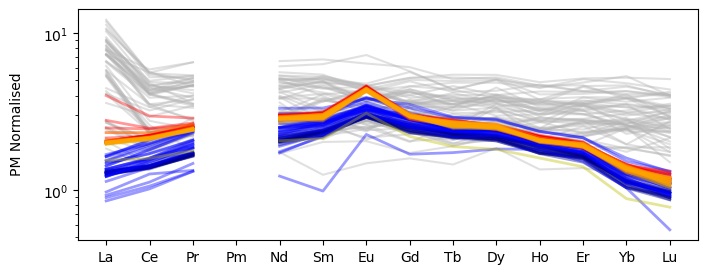

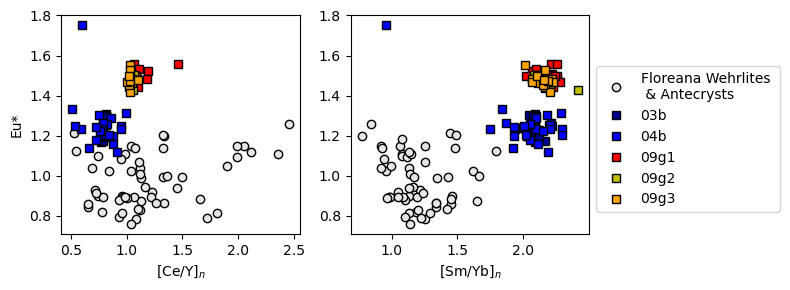

In [5]:
Trace=['La', 'Ce', 'Pr', 'Pm', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Yb', 'Lu']
nm = pd.DataFrame(columns = list(norm.keys()))
nm.loc[0] = np.array(list(norm.values()))

f,a = plt.subplots(1,1, figsize = (8, 3))
plt.subplots_adjust(wspace=0.25, hspace=0.5)

a.set_yscale('log')
f.text(0.04,0.5, 'PM Normalised', va = 'center', rotation = 'vertical')

s = FloTrace[FloTrace['Affinity'] == 'FLO'].loc[:,list(FloTrace.columns[FloTrace.columns.isin(Trace)==True])]/nm.loc[0,list(nm.columns[nm.columns.isin(Trace)==True])]
s = s.T
s = s.reindex(index = Trace)
a.plot(s, color = [0.7,0.7,0.7], alpha = 0.4)
       
for S in color:
    s = PxTrace[PxTrace['Sample'] == S].loc[:,list(PxTrace.columns[PxTrace.columns.isin(Trace)==True])]/nm.loc[0,list(nm.columns[nm.columns.isin(Trace)==True])]
    s = s.T
    s = s.reindex(index = Trace)
    a.plot(s, color = color[S], alpha = 0.4, linewidth = 2)


PxTrace['Eu*'] = (PxTrace['Eu']/norm['Eu'])/(np.sqrt((PxTrace['Sm']/norm['Sm'])*(PxTrace['Gd']/norm['Gd'])))
FloTrace['Eu*'] = (FloTrace['Eu']/norm['Eu'])/(np.sqrt((FloTrace['Sm']/norm['Sm'])*(FloTrace['Gd']/norm['Gd'])))

f, b = plt.subplots(1,2, figsize = (8,3))
b[0].set_xlabel('[Ce/Y]$_{n}$')
b[1].set_xlabel('[Sm/Yb]$_{n}$')

b[0].plot((FloTrace['Ce'][FloTrace['Affinity'] == 'FLO']/norm['Ce'])/(FloTrace['Y'][FloTrace['Affinity'] == 'FLO']/norm['Y']),
         FloTrace['Eu*'][FloTrace['Affinity'] == 'FLO'], 'ok', markerfacecolor = [0.9,0.9,0.9])
b[1].plot((FloTrace['Sm'][FloTrace['Affinity'] == 'FLO']/norm['Sm'])/(FloTrace['Yb'][FloTrace['Affinity'] == 'FLO']/norm['Yb']),
          FloTrace['Eu*'][FloTrace['Affinity'] == 'FLO'],
          'ok', markerfacecolor = [0.9,0.9,0.9], label = 'Floreana Wehrlites \n & Antecrysts')

for S in color:
    b[0].plot((PxTrace['Ce'][PxTrace['Sample'] == S]/norm['Ce'])/(PxTrace['Y'][PxTrace['Sample'] == S]/norm['Y']),
              PxTrace['Eu*'][PxTrace['Sample'] == S], 'sk', markerfacecolor = color[S])
    b[1].plot((PxTrace['Sm'][PxTrace['Sample'] == S]/norm['Sm'])/(PxTrace['Yb'][PxTrace['Sample'] == S]/norm['Yb']),
              PxTrace['Eu*'][PxTrace['Sample'] == S],
              'sk', markerfacecolor = color[S], label = S)

b[0].set_ylabel('Eu*')

legend = b[1].legend(loc='upper left', bbox_to_anchor=(1, 0.8))

f.tight_layout()
